# <center> Mini Projeto - Walmart </center>

---

## O que será feito?
Em um cenário onde a empresa Walmart precisa fazer um levantamento do faturamento das lojas nos USA e apontar qual loja seria melhor para **expandir seu tamanho** será montado um Notebook bem redigido mostrando o passo a passo das etapas de análise do case, fazendo uma introdução e dados atuais sobre o problema. Também será ressaltado/explicado passagens complexas ou insights que você tiver durante a resolução desse projeto.

## Descrição do Projeto
O Projeto de deverá ser desenvolvido em 3 etapas do CRISP-DM, que são o Business Understanding, Data Understanding e Data Preparation

**Business Understanding:** Nessa etapa o principal objetivo será compreender os requisitos do projeto. Para isso precisamos responder 3 tasks principais:
- Determinar os objetivos de negócio
- Fazer a avaliação da situação
- Determinar os objetivos e metas para a mineração de dados

**Data Understanding:** Nessa etapa o principal objetivo será compreender os dados que o projeto possui. Para isso precisamos responder 3 tasks principais:
- Coleta Inicial dos dados
- Descrição dos dados
- Exploração dos dados

**Data Preparation**
- Seleção dos dados
- Limpeza dos dados
- Responder às questões de output de projeto

## Output do Projeto

Ao final da análise, serão respondidas as 5 seguintes questões:

1. Qual o preço médio de vendas semanal por loja?
2. Qual o atributo que tem maior correlação (positiva ou negativa) com o número de vendas?
3. Da loja com maior venda acumulada (soma de vendas de todo o período), quantas semanas do 
ano ele ultrapassou a média do período?
4. Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do 
tempo. Ressalte de alguma forma, o período de feriados mencionados acima
5. Pensando na expansão de uma das lojas, que loja você escolheria e o porque

---

# 1.**Business Understanding**

## Walmart Inc.
Walmart, Inc., é uma multinacional estadunidense de lojas de departamento. A companhia foi fundada por Sam Walton em 1962, incorporada em 31 de outubro de 1969 e feita capital aberto na New York Stock Exchange, em 1972. No ano de 2021, obteve um um lucro de $13.51 Bilhões. Sendo uma das principais lojas de varejo do mundo, os dados contemplam as vendas semanais de 45 lojas espalhadas pelos Estados Unidos. O Walmart realiza vários eventos promocionais de descontos ao longo do ano. Essas remarcações precedem feriados importantes, os quatro maiores de todos, que são o Super Bowl, o Dia do Trabalho, o Dia de Ação de Graças e o Natal. As semanas que incluem esses feriados têm um peso maior.

### Determinando os objetivos de negócio
A empresa precisa fazer um levantamento do faturamento das lojas nos USA e apontar qual loja seria melhor para 
**expandir seu tamanho,** dado que as vendas de uma determinada loja são afetadas por algumas variáveis em cada loja como temperatura, preço do combustível na região, CPI, desemprego.

### Avaliação da Situação
Dataset: https://www.kaggle.com/yasserh/walmart-dataset

Os dados apresentam as vendas semanais de 05/02/10 até 01/11/12 em 45 lojas varejistas da rede Walmart e também algumas métricas econômicas e meteorológicas por semana. A descrição destas características estão abaixo:

- Lista dos 4 maiores feriados americanos

   | Holiday Events | Semanas |
   | --- | --- |
   | Super Bowl | 12-Feb-10, 11-Feb-11, 10-Feb-12 |
   | Labour Day | 10-Sep-10, 09-Sep-11, 07-Sep-12 |
   | Thanksgiving | 26-Nov-10, 25-Nov-11, 23-Nov-12 |
   | Christmas | 31-Dec-10, 30-Dec-11, 28-Dec-12 |
<br></br>
- Descrição de cada coluna das tabelas da base

   | Variável | Descrição |
   | --- | --- |
   | Store | Número de Lojas |
   | Date | Semana de Venda |
   | Weekly_Sales | Venda naquela semana |
   | Holiday_Flag | Flag se é ou não semana com feriado (1 - Holiday Week 0 - Non-Holiday Week) |
   | Temperature | Temperatura do dia em ºF |
   | Fuel_Price | Preço do combustível na região da Loja |
   | CPI | Índice de preços ao consumidor |
   | Unemployment | Taxa de desemprego |
<br></br>
Para que sejam feitos todos os tratamentos e limpezas necessárias será utilizada a linguagem Python e os recursos disponíveis nas bibliotecas Pandas e Seaborn, podendo ser feito uso de outras bibliotecas de dados conforme a necessidade. Além disso, para fins mais ilustrativos poderá ser usado o software Power BI para a confecção de um painel ilustrativo com todos os insights criados.

### Objetivos e Metas para a Mineração de Dados


# 2.**Data Understanding**

### Coleta Inicial dos dados

A coleta da base de dados será feita a partir do arquivo do tipo CSV disponibilizado, utilizando a biblioteca Pandas do Python. Os dados tem origem nessa única fonte, facilitando a coleta e análise dos mesmos. Abaixo segue um o código utilizado para carregar a base de dados através da função read_csv, assim como um print da base para visualização e confirmação do seu formato inicial.

In [49]:
import pandas as pd

pd.options.display.float_format = '{:.2f}'.format # valores da base de dados sendo mostrados apenas com 2 casas decimais.

df = pd.read_csv('Walmart.csv')

print(df)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31        2.57   
1         1  12-02-2010    1641957.44             1        38.51        2.55   
2         1  19-02-2010    1611968.17             0        39.93        2.51   
3         1  26-02-2010    1409727.59             0        46.63        2.56   
4         1  05-03-2010    1554806.68             0        46.50        2.62   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88        4.00   
6431     45  05-10-2012     733455.07             0        64.89        3.98   
6432     45  12-10-2012     734464.36             0        54.47        4.00   
6433     45  19-10-2012     718125.53             0        56.47        3.97   
6434     45  26-10-2012     760281.43             0        58.85        3.88   

        CPI  Unemployment  
0    211.10

### Descrição dos dados

Antes de iniciar as transformações e análises necessárias na base precisamos entender mais sobre as principais características da base de dados, como por exemplo: nº de linhas, nº de colunas, tipos de dados de cada coluna, se existe algum valor nulo dentro da base e etc. Essas informações podem ser obtidas de maneira rápida utilizando a função info() da biblioteca Pandas, como mostrado abaixo.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Além disso, é importante sabermos também se há valores duplicados na base de dados, sendo assim, usaremos a função duplicated() para obtermos uma Serie contendo valores de True caso o dado seja duplicado e False para o contrário. Tendo essa Serie em mãos, podemos utilizar a função sum() para obtermos a quantidade de valores True, ou seja duplicados, que temos na base de dados.

In [51]:
df.duplicated().sum()

0

### Exploração dos dados

Para dar início a exploração dos dados da base, a função describe() também foi utilizada para obtermos informações estatísticas básicas (soma, média, desvio padrão, mínimo, quartis e máximo) das colunas do DataFrame, no caso da base utilizada filtramos ainda para que a função faça os calculos apenas das colunas quantitativas (Weekly_Sales, Temperature, Fuel_Price, CPI e Unemployment), visto que há colunas na base que são de caráter qualitativo (Store, Date e Holiday_Flag) e que não fazem sentido terem essas informações calculadas.

In [52]:
df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00
mean,1046964.88,60.66,3.36,171.58,8.00
std,564366.62,18.44,0.46,39.36,1.88
min,209986.25,-2.06,2.47,126.06,3.88
25%,553350.10,47.46,2.93,131.74,6.89
50%,960746.04,62.67,3.44,182.62,7.87
75%,1420158.66,74.94,3.73,212.74,8.62
max,3818686.45,100.14,4.47,227.23,14.31


### 1. Qual o preço médio de vendas semanal por loja?

Para responder essa pergunta primeiro precisaremos agrupar as vendas de cada loja (Store) calculando sua média de vendas semanal de cada uma. No código abaixo é apresentado esse agrupamento com a utilização da função groupby() sendo a coluna Store a nossa categoria e mean() a nossa função de agregação. O resultado disso é apresentado na Serie abaixo:

In [53]:
# É REALMENTE NECESSÁRIA ESSA ORDENAÇÃO?
#df['Date'] = pd.to_datetime(df['Date']) #Converte coluna Date para o tipo Datetime
#df = df.sort_values(by='Date') #Ordena os dados utilizando 

avg_sales = df.groupby('Store')['Weekly_Sales'].mean()
print(avg_sales)

Store
1    1555264.40
2    1925751.34
3     402704.44
4    2094712.96
5     318011.81
6    1564728.19
7     570617.31
8     908749.52
9     543980.55
10   1899424.57
11   1356383.12
12   1009001.61
13   2003620.31
14   2020978.40
15    623312.47
16    519247.73
17    893581.39
18   1084718.42
19   1444999.04
20   2107676.87
21    756069.08
22   1028501.04
23   1389864.46
24   1356755.39
25    706721.53
26   1002911.84
27   1775216.20
28   1323522.24
29    539451.43
30    438579.62
31   1395901.44
32   1166568.15
33    259861.69
34    966781.56
35    919724.98
36    373511.99
37    518900.28
38    385731.65
39   1450668.13
40    964128.04
41   1268125.42
42    556403.86
43    633324.72
44    302748.87
45    785981.41
Name: Weekly_Sales, dtype: float64


Utilizando esse resultado podemos utilizar as bibliotecas Matplotlib e Seaborn para visualizar os resultados de cada loja na forma de um gráfico de barras verticais. 

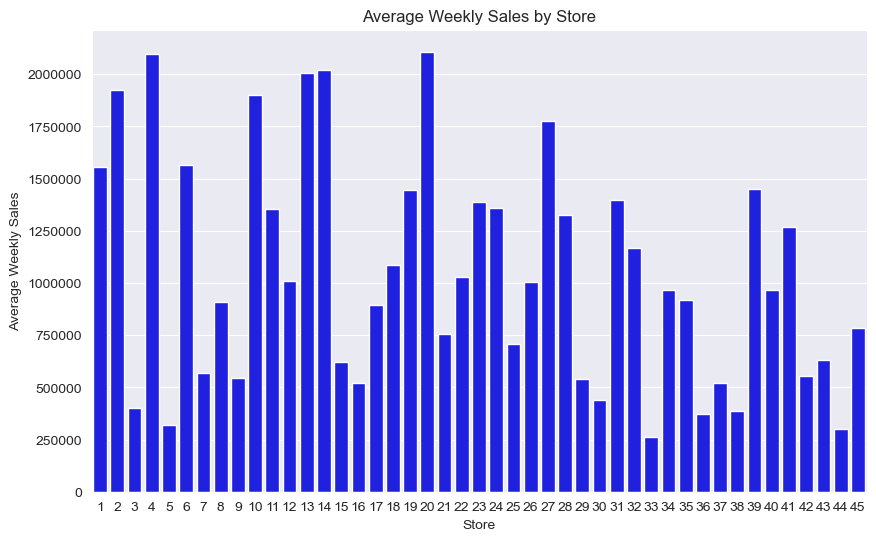

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales.index, y=avg_sales, color='blue')
plt.title('Average Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### 2. Qual o atributo que tem maior correlação (positiva ou negativa) com o número de vendas?